In [1]:
import pandas as pd

sample = pd.read_parquet("D:\\Varun Kumar\\Proejekt\Data\\processed\\ml_sample_200k.parquet")
sample.shape


(200000, 13)

In [3]:
from transformers import pipeline
import torch

sentiment_model = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    device=0,
    truncation=True,
    max_length=512,
    padding=True
)


d:\Varun Kumar\Proejekt\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cuda:0


In [5]:
from tqdm import tqdm
import numpy as np

def bert_sentiment(texts, batch_size=64):
    scores = []
    
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i+batch_size]
        preds = sentiment_model(batch)
        for p in preds:
            scores.append(p["score"] if p["label"]=="POSITIVE" else -p["score"])
            
    return np.array(scores)


In [6]:
texts = sample["content"].astype(str).tolist()

sample["sentiment_bert"] = bert_sentiment(texts, batch_size=64)


100%|██████████| 3125/3125 [29:32<00:00,  1.76it/s]


In [7]:
sample.to_parquet(
    "nlp_sample_with_bert.parquet",
    compression="zstd"
)


In [13]:
sample.head(10)

,post_id,user_id,parent_id,parent_user_id,content,url,language,interaction_type,platform,community,sentiment_vader,publish_ts,year,sentiment_bert
0,d7df83cb-2060-5d7a-933a-6d0052287402,d5195394-7904-5b7e-b5ac-e3f48b71ce85,None,None,I could so. I beat the shit out of toddlers al...,None,English,COMMENT,reddit,CringeAnarchy,0.5622,2018-08-21 10:46:09,2018,-0.939531
1,1d5e3ee3-90ac-5245-a18b-a4e72b0fa4ba,9682bda6-8978-59f0-b5d8-cfa045a48ed7,None,None,"""So what you are telling me is that this commu...",None,English,COMMENT,reddit,CringeAnarchy,-0.7712,2017-03-26 06:48:37,2017,-0.998507
2,baeb96af-e75b-58ac-90a6-103b3887275a,5dfc14bb-9b22-5599-bd11-7172bb9530a2,None,None,"No , and I’m not a good boy ,",None,English,COMMENT,reddit,greatawakening,-0.5583,2018-04-24 21:21:07,2018,-0.999780
3,89142646-6fdb-5035-8fce-361eb5fc3f05,2bf81d72-9ba4-5718-b318-a42bb093fb2c,None,None,**[Shit-show of a script exploding in the dist...,None,English,COMMENT,reddit,CringeAnarchy,-0.7845,2018-07-01 10:17:53,2018,-0.999610
4,273ae2c2-d472-5e75-8163-e8e6b17882bb,5deefb32-a51b-5536-b9c3-bdf999915591,b0bc0cdd-9619-52d1-ba3d-17bf55f0c2d2,c0ddc48a-c185-5071-9460-23e4a4f29ab5,She's definitely a woman. I dont hold my dick ...,None,English,COMMENT,reddit,MensRights,0.4023,2020-01-27 22:35:49,2020,0.996817
5,9d68b2da-f06b-52dd-a263-7f432a4612f0,f0d08611-1670-579c-92f6-83563edf49ef,None,None,= Elliott Rogers,None,English,COMMENT,reddit,KotakuInAction,0.0000,2016-10-30 10:13:02,2016,0.972858
6,96bdebde-4197-57a4-b23d-d4310bfcaeb4,eb4881da-ac58-5d60-b438-e9f9237ef731,None,None,You're generally talking about miniscule perce...,None,English,COMMENT,reddit,CringeAnarchy,0.2263,2017-11-19 18:56:12,2017,0.640434
7,df6ee664-909d-55b5-abda-fdf28eeb7115,68338365-300d-5c0b-b8ae-997c8367471f,None,None,THEY'VE TAKEN A COMMAND POST,None,English,COMMENT,reddit,CringeAnarchy,0.0000,2017-04-22 03:32:24,2017,0.671720
8,ce1c274b-73d2-54c7-9df8-5430c1ce85ec,55721583-c0fe-504f-8684-092b95251809,8ef8b200-992f-5c6d-be87-7052b7651b88,79df2012-c101-57c8-b96a-1e9453e55b67,"See, Now, you got me curious what the other ""p...",None,English,COMMENT,reddit,CringeAnarchy,-0.6908,2018-05-29 04:56:30,2018,0.903512
9,5b0e3a5c-eb4f-5cb5-bb4f-8567b1c23457,a48a7d47-7023-59f7-8de6-1acded6b2b16,4d952042-cbc3-5034-8e70-beae99191053,f5de9a9f-bc1e-58b5-8056-f0e9e7fbc583,The only thing Cher's done that I give a shit ...,https://www.youtube.com/watch?v=TZbf-uwEBuo,English,COMMENT,reddit,MensRights,-0.5574,2019-03-13 05:45:24,2019,-0.995466


In [15]:
from detoxify import Detoxify
import torch

tox_model = Detoxify("original", device="cuda")


Downloading: "https://github.com/unitaryai/detoxify/releases/download/v0.1-alpha/toxic_original-c1212f89.ckpt" to C:\Users\Varun Pravesh/.cache\torch\hub\checkpoints\toxic_original-c1212f89.ckpt
100%|██████████| 418M/418M [03:56<00:00, 1.85MB/s] 


In [17]:
import numpy as np
from tqdm import tqdm

def detoxify_batch(texts, model, batch_size=32):
    results = {
        "toxicity": [],
        "severe_toxicity": [],
        "insult": [],
        "threat": [],
        "identity_attack": []
    }

    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i+batch_size]
        scores = model.predict(batch)

        for key in results:
            results[key].extend(scores[key])

    return results


In [20]:
texts = sample["content"].astype(str).tolist()

tox_scores = detoxify_batch(texts, tox_model, batch_size=32)

sample["toxicity"] = tox_scores["toxicity"]
sample["severe_toxicity"] = tox_scores["severe_toxicity"]
sample["insult"] = tox_scores["insult"]
sample["threat"] = tox_scores["threat"]
sample["identity_attack"] = tox_scores["identity_attack"]


100%|██████████| 6250/6250 [5:11:42<00:00,  2.99s/it]  


In [21]:
sample.to_parquet("nlp_sample_full.parquet", compression="zstd")


In [22]:
import shutil
shutil.copy("nlp_sample_full.parquet", "nlp_sample_full_backup.parquet")


'nlp_sample_full_backup.parquet'

In [26]:
sample.head(10)

,post_id,user_id,parent_id,parent_user_id,content,url,language,interaction_type,platform,community,sentiment_vader,publish_ts,year,sentiment_bert,toxicity,severe_toxicity,insult,threat,identity_attack
0,d7df83cb-2060-5d7a-933a-6d0052287402,d5195394-7904-5b7e-b5ac-e3f48b71ce85,None,None,I could so. I beat the shit out of toddlers al...,None,English,COMMENT,reddit,CringeAnarchy,0.5622,2018-08-21 10:46:09,2018,-0.939531,0.996795,0.282098,0.654875,0.024445,0.006870
1,1d5e3ee3-90ac-5245-a18b-a4e72b0fa4ba,9682bda6-8978-59f0-b5d8-cfa045a48ed7,None,None,"""So what you are telling me is that this commu...",None,English,COMMENT,reddit,CringeAnarchy,-0.7712,2017-03-26 06:48:37,2017,-0.998507,0.997815,0.401440,0.951113,0.014006,0.747224
2,baeb96af-e75b-58ac-90a6-103b3887275a,5dfc14bb-9b22-5599-bd11-7172bb9530a2,None,None,"No , and I’m not a good boy ,",None,English,COMMENT,reddit,greatawakening,-0.5583,2018-04-24 21:21:07,2018,-0.999780,0.004430,0.000100,0.000304,0.000102,0.000187
3,89142646-6fdb-5035-8fce-361eb5fc3f05,2bf81d72-9ba4-5718-b318-a42bb093fb2c,None,None,**[Shit-show of a script exploding in the dist...,None,English,COMMENT,reddit,CringeAnarchy,-0.7845,2018-07-01 10:17:53,2018,-0.999610,0.944028,0.026590,0.059829,0.001597,0.001724
4,273ae2c2-d472-5e75-8163-e8e6b17882bb,5deefb32-a51b-5536-b9c3-bdf999915591,b0bc0cdd-9619-52d1-ba3d-17bf55f0c2d2,c0ddc48a-c185-5071-9460-23e4a4f29ab5,She's definitely a woman. I dont hold my dick ...,None,English,COMMENT,reddit,MensRights,0.4023,2020-01-27 22:35:49,2020,0.996817,0.982909,0.060564,0.306981,0.002463,0.005019
5,9d68b2da-f06b-52dd-a263-7f432a4612f0,f0d08611-1670-579c-92f6-83563edf49ef,None,None,= Elliott Rogers,None,English,COMMENT,reddit,KotakuInAction,0.0000,2016-10-30 10:13:02,2016,0.972858,0.000711,0.000113,0.000180,0.000113,0.000139
6,96bdebde-4197-57a4-b23d-d4310bfcaeb4,eb4881da-ac58-5d60-b438-e9f9237ef731,None,None,You're generally talking about miniscule perce...,None,English,COMMENT,reddit,CringeAnarchy,0.2263,2017-11-19 18:56:12,2017,0.640434,0.000718,0.000115,0.000182,0.000123,0.000138
7,df6ee664-909d-55b5-abda-fdf28eeb7115,68338365-300d-5c0b-b8ae-997c8367471f,None,None,THEY'VE TAKEN A COMMAND POST,None,English,COMMENT,reddit,CringeAnarchy,0.0000,2017-04-22 03:32:24,2017,0.671720,0.001600,0.000100,0.000190,0.000107,0.000167
8,ce1c274b-73d2-54c7-9df8-5430c1ce85ec,55721583-c0fe-504f-8684-092b95251809,8ef8b200-992f-5c6d-be87-7052b7651b88,79df2012-c101-57c8-b96a-1e9453e55b67,"See, Now, you got me curious what the other ""p...",None,English,COMMENT,reddit,CringeAnarchy,-0.6908,2018-05-29 04:56:30,2018,0.903512,0.105557,0.000293,0.010687,0.000238,0.001076
9,5b0e3a5c-eb4f-5cb5-bb4f-8567b1c23457,a48a7d47-7023-59f7-8de6-1acded6b2b16,4d952042-cbc3-5034-8e70-beae99191053,f5de9a9f-bc1e-58b5-8056-f0e9e7fbc583,The only thing Cher's done that I give a shit ...,https://www.youtube.com/watch?v=TZbf-uwEBuo,English,COMMENT,reddit,MensRights,-0.5574,2019-03-13 05:45:24,2019,-0.995466,0.796239,0.008300,0.036453,0.001334,0.001457


In [23]:
sample[["toxicity","identity_attack","threat","insult","severe_toxicity"]].describe()


,toxicity,identity_attack,threat,insult,severe_toxicity
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.203300,0.020837,0.005164,0.080391,0.012656
std,0.335616,0.091623,0.041340,0.202550,0.053554
min,0.000493,0.000118,0.000074,0.000158,0.000076
25%,0.000967,0.000146,0.000114,0.000186,0.000106
50%,0.007889,0.000240,0.000145,0.000436,0.000123
75%,0.254490,0.002624,0.000820,0.016211,0.000801
max,0.999258,0.972149,0.922736,0.987431,0.890064


In [24]:
sample.groupby("platform")[["toxicity","identity_attack","threat","insult"]].mean()



,toxicity,identity_attack,threat,insult
platform,,,,
reddit,0.212113,0.023369,0.005301,0.082231
voat,0.194487,0.018305,0.005027,0.078552


<Axes: xlabel='year', ylabel='toxicity'>

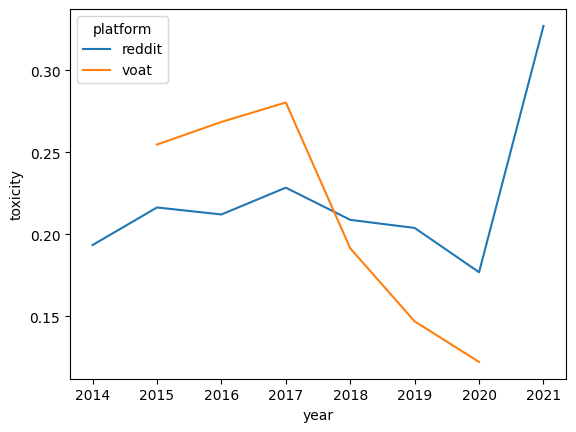

In [27]:
import seaborn as sns

sns.lineplot(
    data=sample.groupby(["year","platform"])["toxicity"].mean().reset_index(),
    x="year",
    y="toxicity",
    hue="platform"
)
